Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


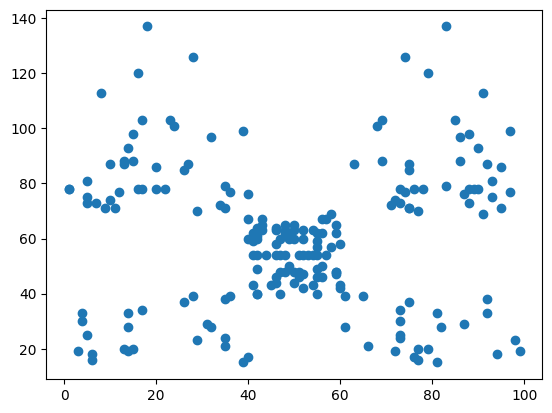

In [ ]:
plt.scatter(df["Spending Score (1-100)"] , df["Annual Income (k$)"])
plt.show()

In [ ]:
ssw = []
clusters = range(1,10)
for i in clusters:
    model = KMeans(n_clusters = i , init='k-means++' , n_init=100)
    model.fit(df[["Spending Score (1-100)" , "Annual Income (k$)"]])
    ssw.append(model.inertia_)

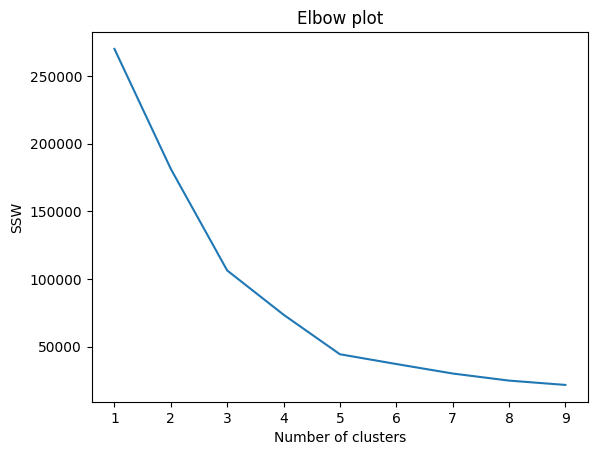

In [ ]:
plt.xlabel("Number of clusters")
plt.ylabel("SSW")
plt.title("Elbow plot")
plt.plot(clusters , ssw)

Elbow plot has indentified that 5 groups clustering is the best way for clustering data

In [ ]:
model = KMeans(n_clusters = 5, init='k-means++',n_init=100)
y_predicted  = model.fit_predict(df[["Spending Score (1-100)" , "Annual Income (k$)"]])
y_predicted

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
df["Group"] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


Text(0, 0.5, 'Annual Income')

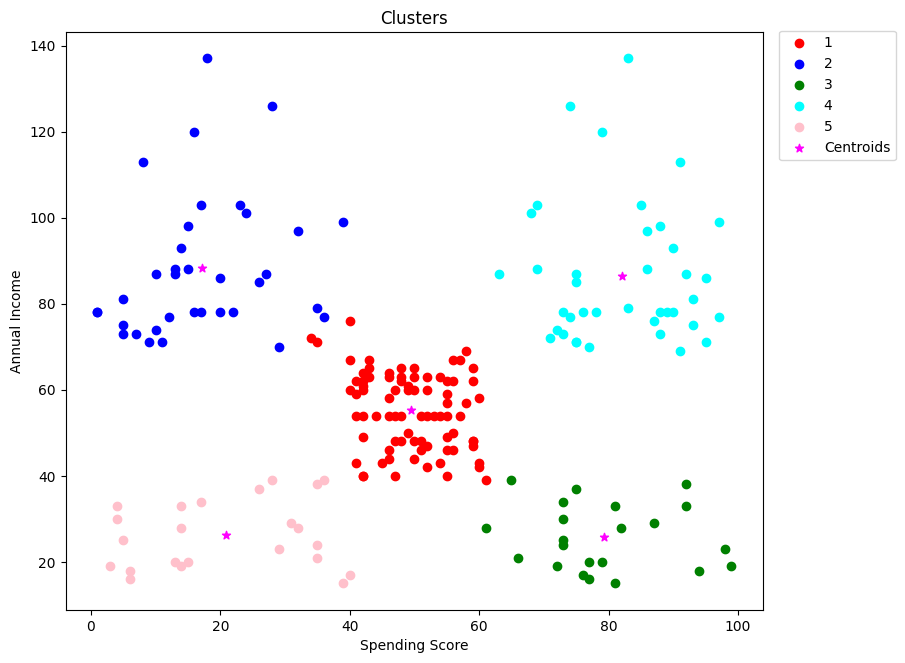

In [ ]:
#Visualizing all the clusters
df1=  df[df.Group == 0]
df2=  df[df.Group == 1]
df3=  df[df.Group == 2]
df4=  df[df.Group == 3]
df5=  df[df.Group == 4]
plt.figure(figsize = (9,7.5))
plt.scatter(df1["Spending Score (1-100)"] , df1["Annual Income (k$)"]  , color = "red" , label = "1")
plt.scatter(df2["Spending Score (1-100)"] , df2["Annual Income (k$)"]  , color = "blue" , label = "2")
plt.scatter(df3["Spending Score (1-100)"] , df3["Annual Income (k$)"] , color = "green" , label = "3")
plt.scatter(df4["Spending Score (1-100)"] , df4["Annual Income (k$)"], color = "cyan" , label = "4")
plt.scatter(df5["Spending Score (1-100)"] , df5["Annual Income (k$)"] , color = "pink" , label = "5")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")